In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [13]:
def recenter_image(image):
    #ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image


def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(7,7))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()
    

def display_batch(batch):    
    #get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                   batched_bboxes[idx, :num_bboxes[idx], :], 
                   batched_classes[idx, ...])

In [14]:
from utils import get_train_input

In [15]:
train_dataset = get_train_input('./experiments/reference/pipeline_new.config')

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-1051897962568538022_238_170_258_170_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10964956617027590844_1584_68

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-1051897962568538022_238_170_258_170_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord', '/home/workspace/data/waymo/train/segment-10964956617027590

INFO:tensorflow:Number of filenames to read: 82


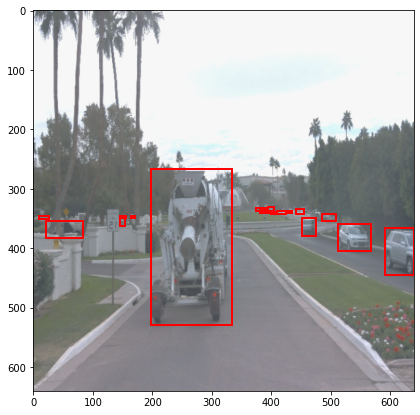

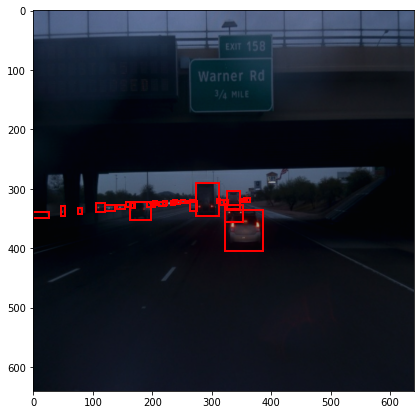

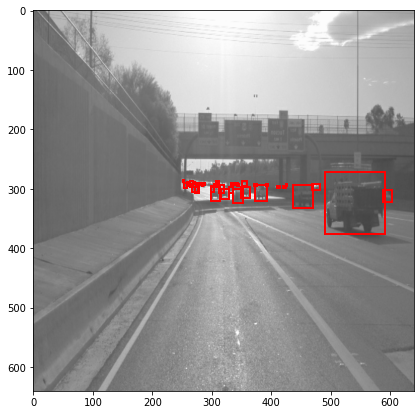

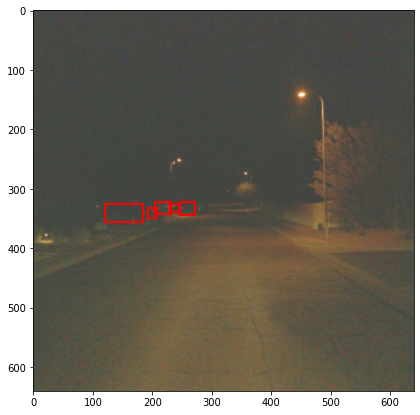

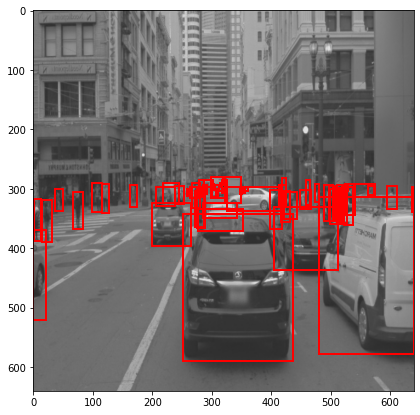

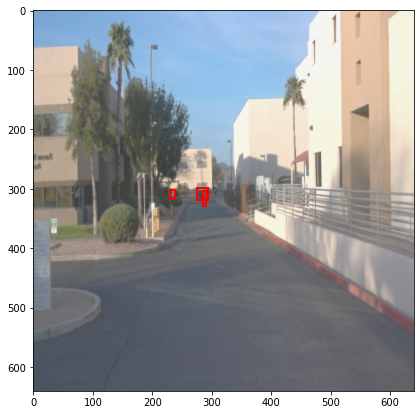

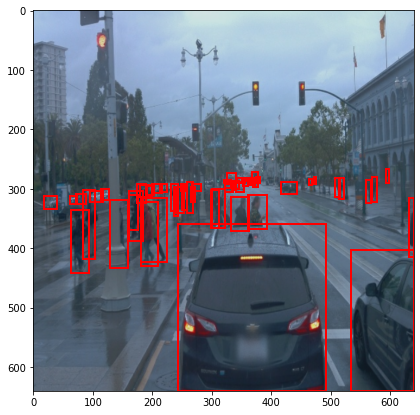

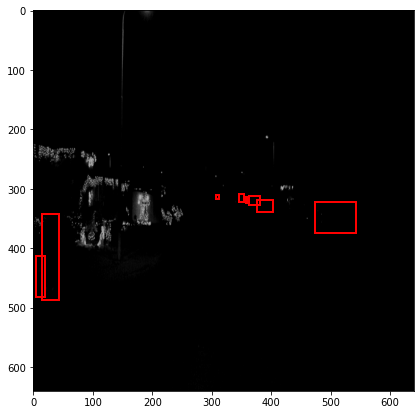

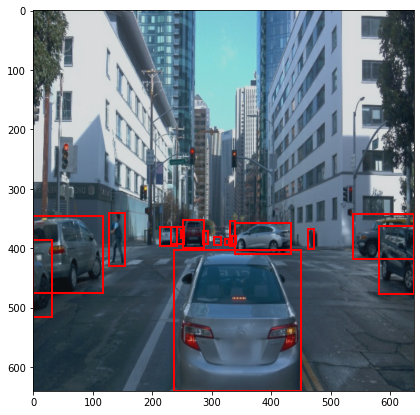

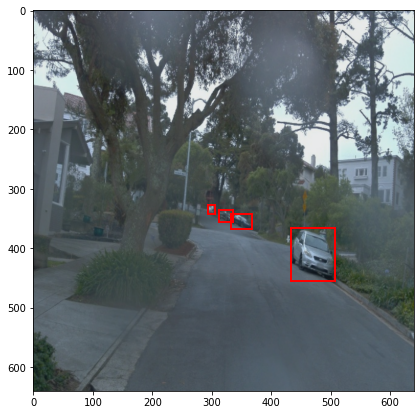

In [16]:
%matplotlib inline

for batch in train_dataset.take(5):
    display_batch(batch)